# Geographic Data Visualization with Python

## Introduction
Geographic data visualization is the process of representing spatial data on maps. It's a powerful way to understand patterns, trends, and relationships that are tied to specific locations on Earth. From tracking disease outbreaks to planning urban development, and analyzing climate change, geo-visualization provides critical insights that might be missed in tabular data alone.

In this notebook, we will explore various techniques and Python libraries for geographic data visualization, focusing on `Basemap` for static, high-quality maps, and introducing `GeoPandas`, `Folium`, and `Plotly Express` for more advanced and interactive visualizations.

### Importance and Applications
-   **Urban Planning:** Analyzing population density, infrastructure, and resource distribution.
-   **Environmental Science:** Mapping pollution, deforestation, climate change impacts, and biodiversity.
-   **Public Health:** Tracking disease spread, identifying health disparities, and planning vaccination campaigns.
-   **Logistics and Transportation:** Optimizing routes, visualizing supply chains, and managing traffic flow.
-   **Social Sciences:** Understanding demographic shifts, voting patterns, and cultural distributions.

### Overview of Python Libraries for Geo-Visualization
-   **Basemap:** A Matplotlib extension for plotting 2D data on maps. It's excellent for creating high-quality static maps with various projections and drawing capabilities.
-   **GeoPandas:** Extends Pandas data structures to allow spatial operations on geometric types. It's ideal for working with geospatial vector data (points, lines, polygons) and creating choropleth maps.
-   **Folium:** A wrapper for the Leaflet.js library, enabling the creation of interactive web maps that can be embedded in notebooks or exported as HTML files.
-   **Plotly Express:** A high-level API for Plotly, offering a quick and easy way to create interactive plots, including animated and interactive choropleth maps.

## 1. Setting Up Your Environment
First, let's ensure we have all the necessary libraries installed. If you're running this in a Colab environment, `basemap` might require a special installation. For other environments, `pip install` commands are standard.

In [ ]:
# Install Basemap (specific for Colab/Jupyter compatibility)
%pip install basemap basemap-data-hires
# Install other libraries
%pip install matplotlib numpy pandas geopandas folium plotly

Now, let's import the libraries we'll be using throughout this notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import folium
import plotly.express as px

## 2. Understanding Map Projections
The Earth is a sphere (or more accurately, an oblate spheroid), but maps are flat. A **map projection** is a systematic transformation of the Earth's curved surface onto a flat plane. This transformation always involves some distortion, as it's impossible to perfectly represent a 3D surface in 2D without stretching, tearing, or compressing it.

The choice of projection depends heavily on the purpose of the map and which properties (area, shape, distance, direction) are most important to preserve.

### Common Types of Projections
Map projections are often classified by the geometric surface they project onto (cylindrical, conic, azimuthal) and the properties they preserve (conformal, equal-area, equidistant).

- **Conformal (Shape-Preserving):** Cylindrical projections preserve local shapes and angles. A circle on the globe will appear as a circle on the map. This is crucial for navigation, where maintaining correct angles is essential. The Mercator projection is a classic example.
- **Equal-Area (Area-Preserving):** Conic projections ensure that areas on the map are proportional to their true areas on the globe. This is vital for thematic maps showing distributions (e.g., population density, resource allocation), as it prevents misinterpretation of size. The Albers Equal-Area projection is a common choice.
- **Equidistant (Distance-Preserving):** Azimuthal projections preserve true distances from one or two specific points to all other points on the map. No projection can preserve all distances everywhere. An example is the Azimuthal Equidistant projection, often used for showing great-circle routes from a central point.

### a. Cylindrical Projections
Imagine wrapping a cylinder around the globe. Points are projected onto this cylinder, which is then unrolled into a flat map. These projections are best for showing the entire world or regions near the equator. They typically distort areas near the poles.

-   **Mercator (`'merc'`)**:
    -   **Description:** Preserves angles and shapes locally (conformal), making it useful for navigation. Lines of constant bearing (rhumb lines) are straight. However, it severely distorts areas, especially near the poles, making Greenland appear much larger than Africa, for example.
    -   **Use Cases:** Navigation charts, world maps where shape preservation is key.
    -   **Basemap Parameters:**
        -   `projection='merc'`: Specifies the Mercator projection.
        -   `llcrnrlat`, `urcrnrlat`, `llcrnrlon`, `urcrnrlon`: Lower-left and upper-right corner latitude/longitude for the map extent. These define the bounding box of your map.
        -   `resolution`: Controls the resolution of the coastlines and other drawn features. Options include `'c'` (crude), `'l'` (low), `'i'` (intermediate), `'h'` (high), `'f'` (full). Higher resolution means more detail but slower rendering.
        -   `lat_ts`: Latitude of true scale. This is the latitude where the scale is true; away from this line, scale distortion increases. For Mercator, often set to 0 or a mid-latitude value for regional maps.


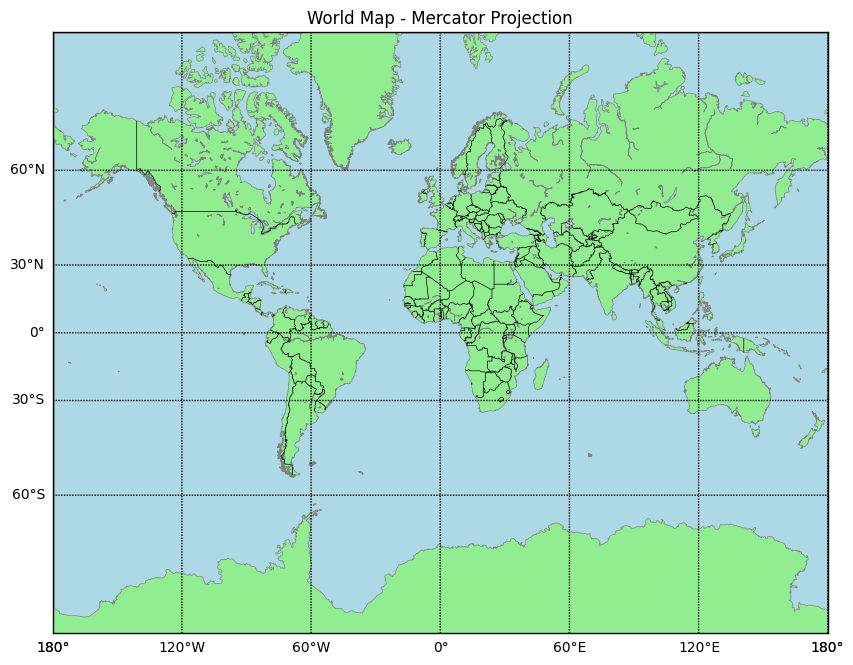

In [3]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='l')

# Draw map features
m.drawcoastlines(linewidth=0.5, color='gray') # linewidth: thickness of the lines, color: color of the lines
m.drawcountries(linewidth=0.5, color='black') # Draws country borders
m.fillcontinents(color='lightgreen', lake_color='lightblue') # Fills land with lightgreen, lakes with lightblue
m.drawmapboundary(fill_color='lightblue') # Fills the ocean/map background with lightblue

# Draw parallels (horizontal lines of latitude) and meridians (vertical lines of longitude)
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0]) # labels: [left, right, top, bottom] for labels. Here, only left labels are shown.
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1]) # Here, only bottom labels are shown.

plt.title("World Map - Mercator Projection")
plt.show()

-   **Cylindrical Equidistant (`'cyl'`)**:
    -   **Description:** Also known as the Plate Carrée or Geographic projection. It's very simple: latitude and longitude lines are equally spaced and form a grid. This simplicity comes at the cost of distorting both shape and area, especially away from the equator.
    -   **Use Cases:** Simple world maps, often used for data where the exact shape/area is less critical than a quick visual representation.
    -   **Basemap Parameters:** Similar to Mercator, but `lat_ts` is less critical as it's not conformal.


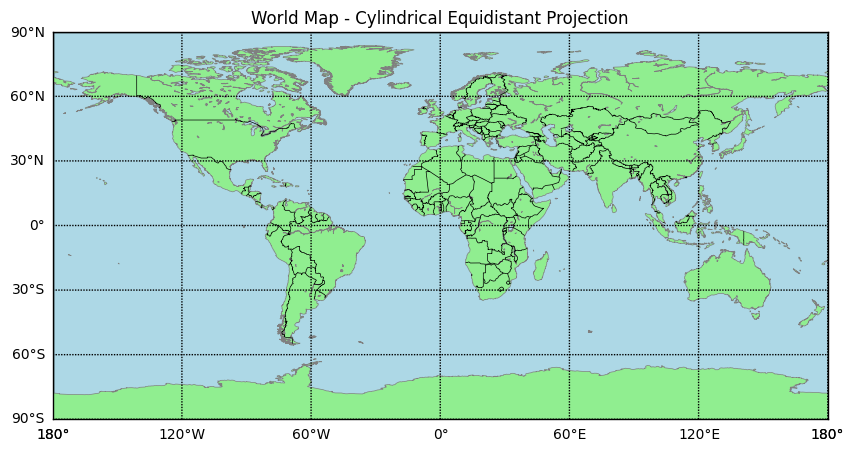

In [4]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, \
            llcrnrlon=-180, urcrnrlon=180, resolution='l')

m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='black')
m.fillcontinents(color='lightgreen', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1])

plt.title("World Map - Cylindrical Equidistant Projection")
plt.show()

### b. Conic Projections
Imagine placing a cone over the globe, with its apex usually over one of the poles. Points are projected onto the cone, which is then unrolled. These projections are best for mid-latitude regions and often preserve area or shape.

-   **Lambert Conformal Conic (`'lcc'`)**:
    -   **Description:** Preserves shape over small areas (conformal) and is widely used for aeronautical charts and regional maps in mid-latitudes (e.g., North America, Europe). It's a good compromise projection.
    -   **Use Cases:** Regional maps, weather maps, state/national maps.
    -   **Basemap Parameters:**
        -   `projection='lcc'`
        -   `lat_1`, `lat_2`: Standard parallels, where the cone intersects the globe. These are the lines of true scale and no distortion.
        -   `lon_0`: Central longitude, which determines the central meridian of the projection.
        -   `lat_0`: Central latitude, usually the center of your map region.
        -   `width`, `height`: The width and height of the map in meters. Alternatively, you can use `llcrnrlat`, `urcrnrlat`, `llcrnrlon`, `urcrnrlon`.


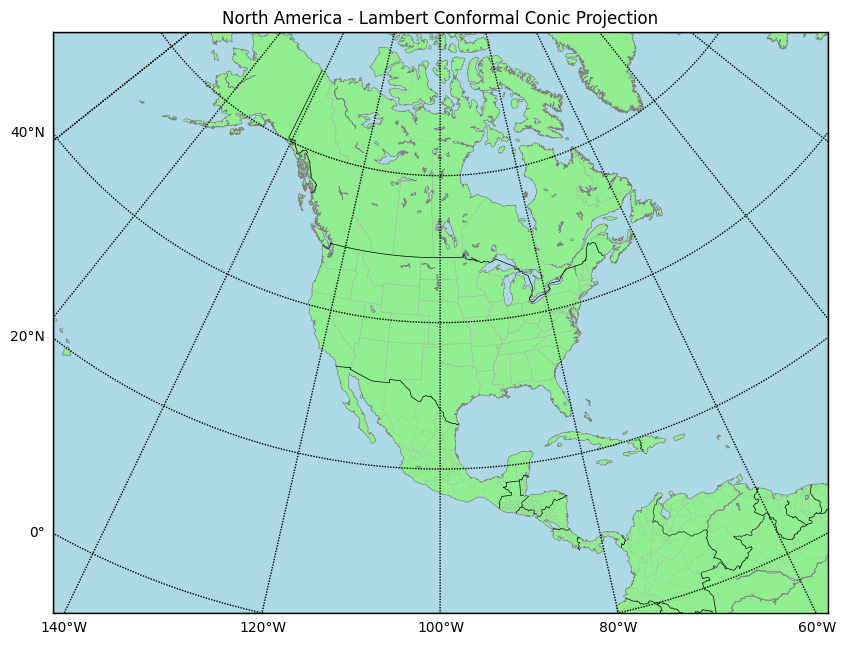

In [5]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', width=12000000, height=9000000, \
            lat_0=40, lon_0=-100, resolution='l')

m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='black')
m.drawstates(linewidth=0.2, color='darkgray') # Draws state borders for finer detail
m.fillcontinents(color='lightgreen', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

m.drawparallels(np.arange(0., 81., 20.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1])

plt.title("North America - Lambert Conformal Conic Projection")
plt.show()

-   **Albers Equal-Area Conic (`'aea'`)**:
    -   **Description:** Preserves area (equal-area), meaning that relative sizes of landmasses are accurate. It's a good choice for thematic maps showing distributions where area accuracy is important.
    -   **Use Cases:** Thematic maps, atlases, continental maps.
    -   **Basemap Parameters:** Similar to LCC, requiring `lat_1`, `lat_2`, `lon_0`, `lat_0`.


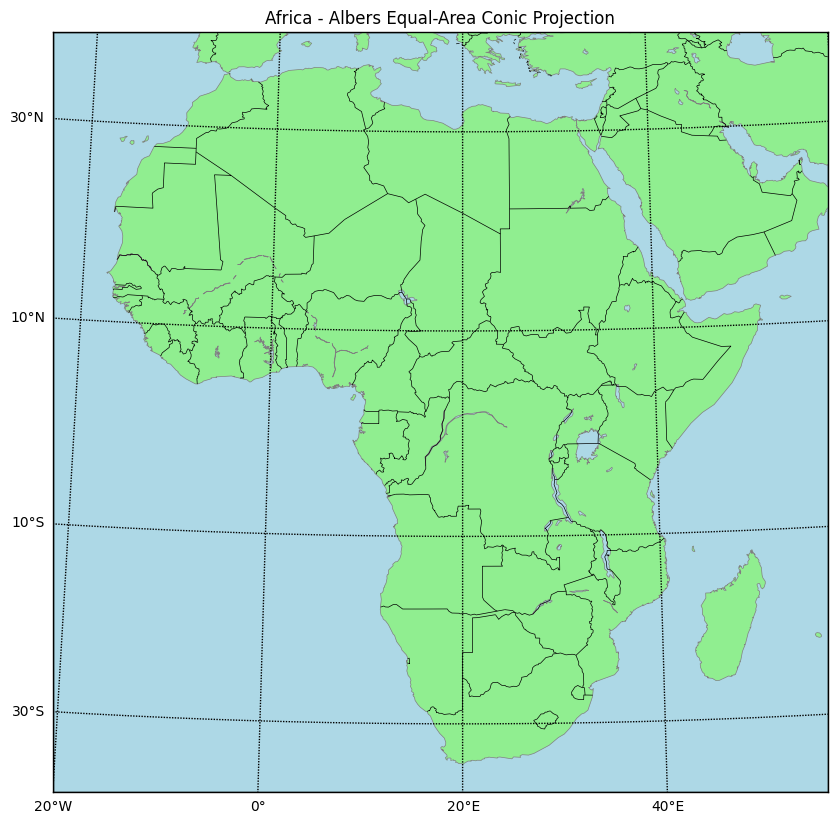

In [ ]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='aea', llcrnrlat=-40, urcrnrlat=40, \
            llcrnrlon=-20, urcrnrlon=60, lat_1=-10, lat_2=20, lon_0=20, resolution='l')

m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='black')
m.fillcontinents(color='lightgreen', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1])

plt.title("Africa - Albers Equal-Area Conic Projection")
plt.show()

### c. Azimuthal Projections
These projections are created by projecting the globe onto a flat plane tangent to the globe at a single point. They are best for showing polar regions or for maps where true direction from a central point is important.

-   **Orthographic (`'ortho'`)**:
    -   **Description:** Simulates the view of the Earth from space. Only one hemisphere can be seen at a time. It preserves true scale and shape only at the center point of the projection.
    -   **Use Cases:** Visualizing hemispheres, artistic maps.
    -   **Basemap Parameters:**
        -   `projection='ortho'`
        -   `lat_0`, `lon_0`: The central latitude and longitude of the projection, defining the point from which the view is centered.


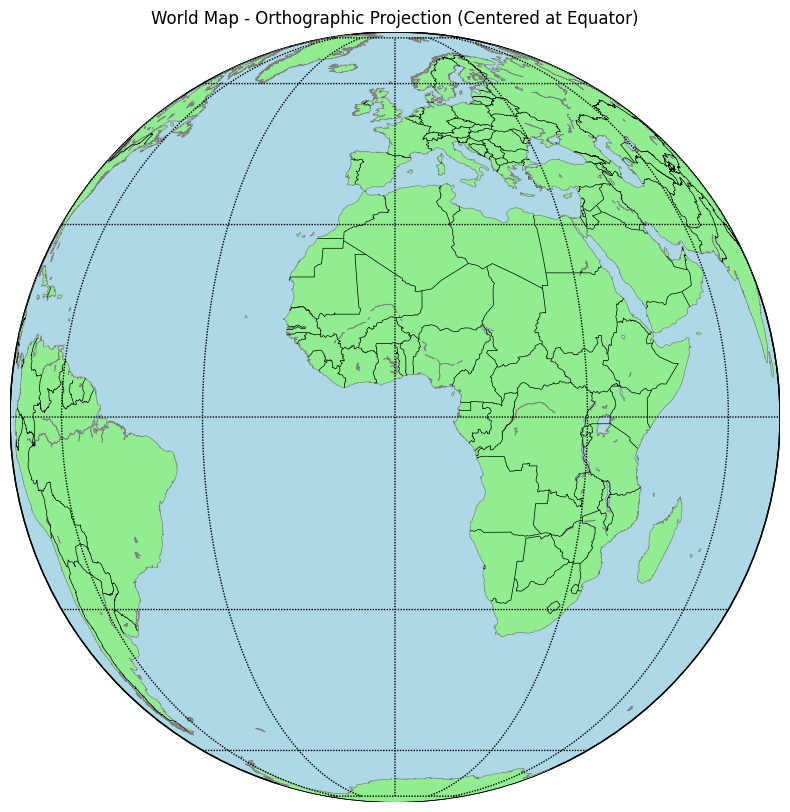

In [7]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='ortho', lat_0=0, lon_0=0, resolution='l') # Centered at (0,0) - equator and prime meridian

m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='black')
m.fillcontinents(color='lightgreen', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

m.drawparallels(np.arange(-90., 91., 30.))
m.drawmeridians(np.arange(-180., 181., 30.))

plt.title("World Map - Orthographic Projection (Centered at Equator)")
plt.show()

-   **Lambert Azimuthal Equal-Area (`'laea'`)**:
    -   **Description:** Preserves area (equal-area) and is useful for showing the entire world or large regions, especially polar areas, where accurate area representation is crucial.
    -   **Use Cases:** Polar maps, global thematic maps.
    -   **Basemap Parameters:** Similar to orthographic, requiring `lat_0`, `lon_0`.


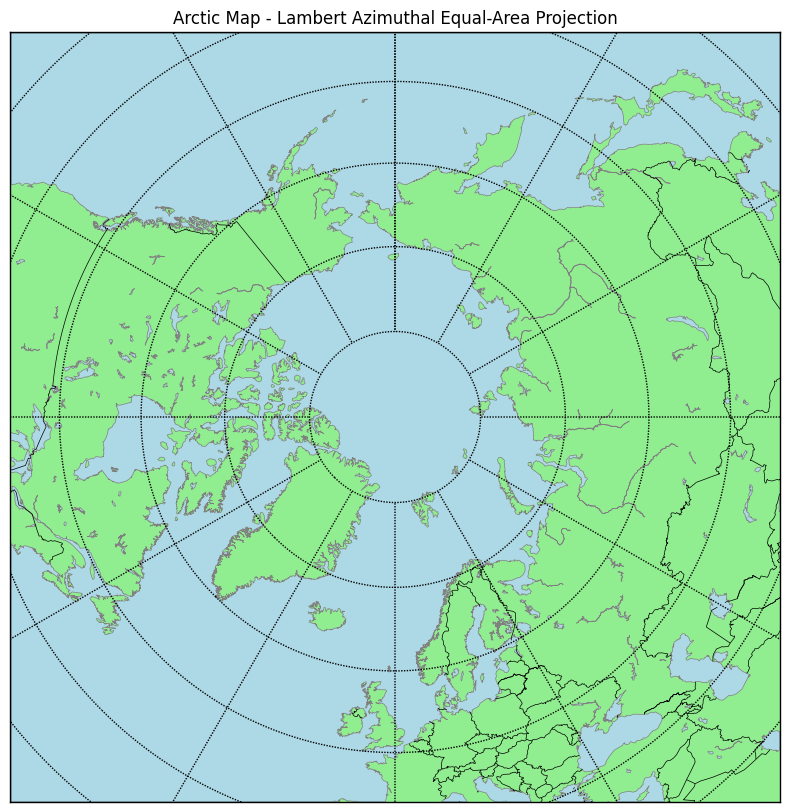

In [13]:
plt.figure(figsize=(10, 10))
# Added width and height parameters for the 'laea' projection
m = Basemap(projection='laea', lat_0=90, lon_0=0, resolution='l', width=10000000, height=10000000) # Centered at North Pole

m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='black')
m.fillcontinents(color='lightgreen', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

m.drawparallels(np.arange(0., 91., 10.))
m.drawmeridians(np.arange(-180., 181., 30.))

plt.title("Arctic Map - Lambert Azimuthal Equal-Area Projection")
plt.show()

### Choosing the Right Projection
The choice of map projection is crucial and depends on:
-   **Purpose:** What story are you trying to tell? (e.g., navigation, area comparison, distance measurement).
-   **Geographic Extent:** Are you mapping a local area, a continent, or the entire world?
-   **Properties to Preserve:** Do you need to maintain accurate shapes (conformal), areas (equal-area), distances (equidistant), or directions (azimuthal)?

| Property Preserved | Projection Type | Common Use Cases |
|--------------------|-----------------|-------------------|
| Shape (Conformal)  | Mercator, LCC   | Navigation, regional maps |
| Area (Equal-Area)  | Albers, LAEA    | Thematic maps, population density |
| Distance (Equidistant) | Equidistant Cylindrical | Simple world maps, great circle routes |
| Direction (Azimuthal) | Gnomonic, Orthographic | Air routes, polar maps |

It's important to be aware of the distortions inherent in any projection and choose one that minimizes distortion for the specific properties most relevant to your data and message.

## 3. Basic Map Elements and Styling
Once you've chosen a projection and initialized your `Basemap` object, you can add various geographical features and style them to create an informative and aesthetically pleasing map.

### Drawing Coastlines, Countries, and States
These functions are fundamental for providing geographical context to your data.

-   `m.drawcoastlines(linewidth=0.5, color='gray')`:
    -   **Purpose:** Draws the coastlines of all landmasses.
    -   **`linewidth`:** Controls the thickness of the lines. A float value (e.g., `0.5`, `1.0`).
    -   **`color`:** Sets the color of the lines. Can be a string (e.g., `'black'`, `'blue'`) or an RGB tuple.
-   `m.drawcountries(linewidth=0.5, color='black')`:
    -   **Purpose:** Draws international country borders.
    -   **Parameters:** Same as `drawcoastlines`.
-   `m.drawstates(linewidth=0.2, color='darkgray')`:
    -   **Purpose:** Draws state or provincial borders within countries (primarily for US, Canada, and Australia).
    -   **Parameters:** Same as `drawcoastlines`.


### Drawing Parallels and Meridians
These are lines of latitude and longitude, forming a grid (graticule) that helps in locating positions on the map.

-   `m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], dashes=[1,0])`:
    -   **Purpose:** Draws lines of latitude (parallels).
    -   **`np.arange(start, stop, step)`:** Generates an array of latitudes to draw. Here, from -90 to 90 degrees with a step of 30.
    -   **`labels`:** A list of 4 integers `[left, right, top, bottom]`. A `1` indicates that labels should be drawn on that side, `0` means no label. For parallels, `labels=[1,0,0,0]` means labels on the left side only.
    -   **`fmt`:** A format string for the labels (e.g., `'%.0f'` for integers, `'%.1f'` for one decimal place).
    -   **`dashes`:** A list `[line_length, space_length]` in points. Controls the pattern of dashed lines. `[1,0]` means a solid line (1 point line, 0 point space).
    -   **`color`:** Color of the grid lines.
-   `m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], dashes=[1,0])`:
    -   **Purpose:** Draws lines of longitude (meridians).
    -   **Parameters:** Similar to `drawparallels`. For meridians, `labels=[0,0,0,1]` means labels on the bottom side only.


### Filling Land and Ocean
Coloring land and water bodies enhances the visual appeal and clarity of the map.

-   `m.fillcontinents(color='lightgreen', lake_color='lightblue')`:
    -   **Purpose:** Fills the land areas with a specified color.
    -   **`color`:** Color for continents.
    -   **`lake_color`:** Color for inland lakes.
-   `m.drawmapboundary(fill_color='lightblue')`:
    -   **Purpose:** Fills the background of the map (typically oceans) with a specified color.
    -   **`fill_color`:** Color for the map boundary/ocean.


### Adding a Scale Bar
A scale bar helps users understand the distances represented on the map.

-   `m.drawmapscale(lon, lat, lon0, lat0, length, barstyle='fancy', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='black', fillcolor1='white', fillcolor2='gray', ax=None, zorder=None)`:
    -   **Purpose:** Draws a scale bar on the map.
    -   **`lon`, `lat`:** Longitude and latitude of the left end of the scale bar.
    -   **`lon0`, `lat0`:** Longitude and latitude of the point on the map where the scale is true (usually the center of the map or a standard parallel).
    -   **`length`:** The length of the scale bar in kilometers.
    -   **`barstyle`:** Style of the scale bar. `'fancy'` (default) or `'simple'`.
    -   **`fontsize`:** Font size for the scale bar labels.
    -   **`yoffset`:** Vertical offset of the scale bar from the specified `lat` (in map units).
    -   **`labelstyle`:** Style of the labels. `'simple'` (default) or `'fancy'`.
    -   **`fontcolor`:** Color of the text labels.
    -   **`fillcolor1`, `fillcolor2`:** Colors for alternating segments of the scale bar (for `'fancy'` style).


### Adding a Title
A clear title is essential for any visualization.

-   `plt.title("My Geographic Map")`:
    -   **Purpose:** Sets the title of the plot.
    -   **Parameter:** A string containing the desired title.


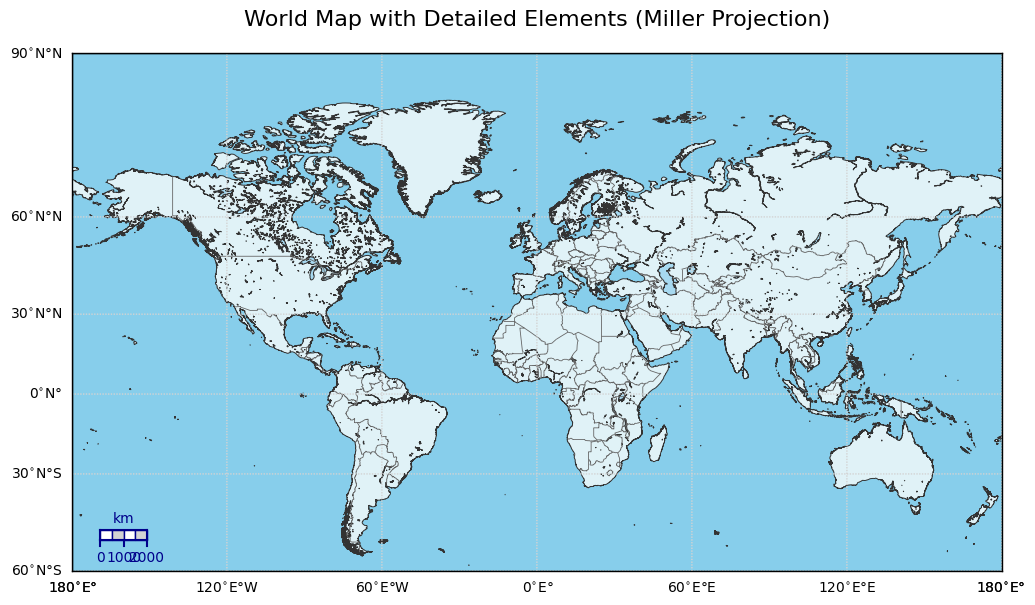

In [10]:
plt.figure(figsize=(12, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, \
            llcrnrlon=-180, urcrnrlon=180, resolution='i')

# Draw map features with custom styling
m.drawcoastlines(linewidth=0.7, color='#333333') # Darker grey coastlines
m.drawcountries(linewidth=0.6, color='#666666') # Medium grey country borders
m.fillcontinents(color='#E0F2F7', lake_color='#A7D9F0') # Light blue-green land, light blue lakes
m.drawmapboundary(fill_color='#87CEEB') # Sky blue ocean background

# Draw parallels and meridians with labels
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], fmt='%.0f$^{\circ}$N', fontsize=10, dashes=[1,1], color='lightgray')
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], fmt='%.0f$^{\circ}$E', fontsize=10, dashes=[1,1], color='lightgray')

# Add a scale bar
# The first two parameters (lon, lat) are the position of the lower-left corner of the scale bar.
# The next two (lon0, lat0) are the reference point for scale calculation (usually map center).
# 'length' is the desired length of the scale bar in km.
m.drawmapscale(-160, -50, 0, 0, 2000, barstyle='fancy', fontsize=10, fontcolor='darkblue', fillcolor1='white', fillcolor2='lightgray')

plt.title("World Map with Detailed Elements (Miller Projection)", fontsize=16, pad=20)
plt.show()

## 4. Plotting Geographic Data
Once the base map is set up, you can overlay your data using various plotting techniques. Basemap provides functions that convert latitude and longitude coordinates into the map's x and y coordinates, allowing you to use standard Matplotlib plotting functions.

### Key Concept: Coordinate Transformation
Before plotting any data (points, lines, etc.), you must convert your geographic coordinates (latitude, longitude) into the map's projected (x, y) coordinates. The `Basemap` object itself acts as a function for this transformation:

```python
x, y = m(longitude, latitude)
```
This `x, y` pair can then be used with Matplotlib's `plt.plot()`, `plt.scatter()`, etc.

### Scatter Plots on Maps
Scatter plots are used to visualize individual points of interest on a map. The size and color of the markers can be used to represent additional data attributes.

-   **`m.scatter(x, y, s=size, c=color, alpha=opacity, cmap=colormap, marker='o', edgecolors='none', zorder=None)`**:
    -   **Purpose:** Plots points on the map.
    -   **`x`, `y`:** Arrays of projected x and y coordinates (obtained from `m(lon, lat)`).
    -   **`s` (size):** Scalar or array of marker sizes. Useful for showing magnitude (e.g., population, earthquake magnitude).
    -   **`c` (color):** Scalar or array of values to map to colors. Can be a single color string or an array of numerical values used with `cmap`.
    -   **`alpha` (opacity):** Transparency of the markers (0.0 to 1.0). Useful for dense plots.
    -   **`cmap` (colormap):** Colormap to use if `c` is an array of values (e.g., `'viridis'`, `'Reds'`).
    -   **`marker`:** Symbol for the points (e.g., `'o'` for circle, `'s'` for square, `'^'` for triangle).
    -   **`edgecolors`:** Color of the marker's edge. Set to `'none'` for no edge.
    -   **`zorder`:** Drawing order of elements. Higher `zorder` means the element is drawn on top.


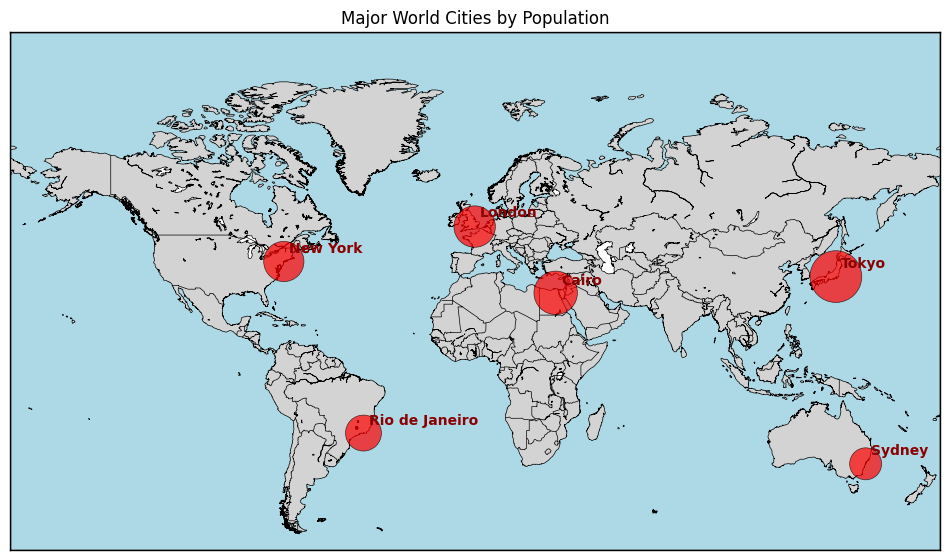

In [3]:

plt.figure(figsize=(12, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, \
            llcrnrlon=-180, urcrnrlon=180, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Example Data: Major World Cities (simplified)
cities = {
    'New York': {'lat': 40.7128, 'lon': -74.0060, 'pop': 8.4},
    'London': {'lat': 51.5074, 'lon': -0.1278, 'pop': 8.9},
    'Tokyo': {'lat': 35.6895, 'lon': 139.6917, 'pop': 13.9},
    'Sydney': {'lat': -33.8688, 'lon': 151.2093, 'pop': 5.3},
    'Rio de Janeiro': {'lat': -22.9068, 'lon': -43.1729, 'pop': 6.7},
    'Cairo': {'lat': 30.0444, 'lon': 31.2357, 'pop': 9.8}
}

lats = [city['lat'] for city in cities.values()]
lons = [city['lon'] for city in cities.values()]
pops = [city['pop'] for city in cities.values()]
city_names = list(cities.keys())

# Convert lat/lon to map coordinates
x, y = m(lons, lats)

# Plot cities as scatter points
# s (size): scaled by population for visual impact (e.g., pop * 100)
# c (color): a single color for all points, or an array for a colormap
# alpha: transparency to handle overlapping points
m.scatter(x, y, s=[p * 100 for p in pops], c='red', alpha=0.7, edgecolors='black', linewidth=0.5, zorder=5)

# Add labels for cities (optional, for clarity)
for i, (name, lat, lon) in enumerate(zip(city_names, lats, lons)):
    x_text, y_text = m(lon + 2, lat + 2) # Offset text slightly for readability
    plt.text(x_text, y_text, name, fontsize=10, ha='left', va='bottom', color='darkred', weight='bold', zorder=6)

plt.title("Major World Cities by Population")
plt.show()

### Line Plots on Maps
Line plots are used to visualize paths, routes, or trajectories on a map.

-   **`m.plot(x, y, color='blue', linewidth=2, linestyle='-', marker=None, zorder=None)`**:
    -   **Purpose:** Plots lines on the map.
    -   **`x`, `y`:** Arrays of projected x and y coordinates defining the line segments.
    -   **`color`:** Color of the line.
    -   **`linewidth`:** Thickness of the line.
    -   **`linestyle`:** Style of the line (e.g., `'-'` for solid, `'--'` for dashed, `':'` for dotted).
    -   **`marker`:** Marker style at each point along the line (optional).


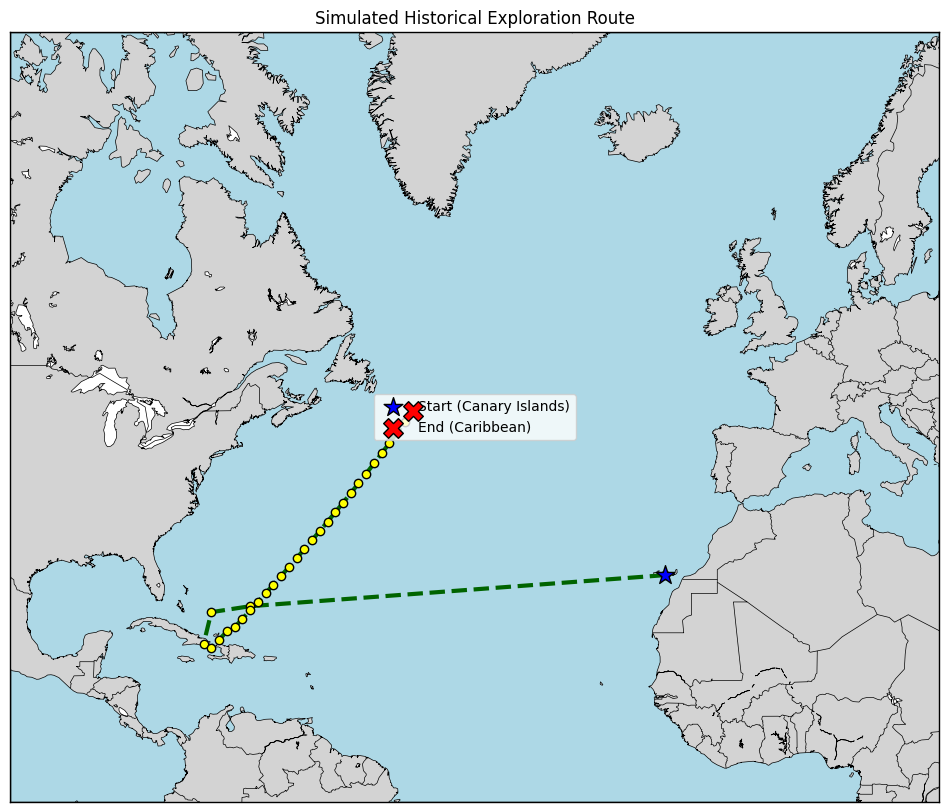

In [47]:
plt.figure(figsize=(12, 10))
m = Basemap(projection='merc', llcrnrlat=0, urcrnrlat=70, \
            llcrnrlon=-100, urcrnrlon=20, lat_ts=20, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Example Data: A historical exploration route (e.g., Columbus's first voyage)
route_lats = [28.1, 24.5, 23.8, 20.0, 19.5, 20.5, 21.5, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0]
route_lons = [-15.4, -69.0, -74.0, -75.0, -74.0, -73.0, -72.0, -71.0, -70.0, -69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -61.0, -60.0, -59.0, -58.0, -57.0, -56.0, -55.0, -54.0, -53.0, -52.0, -51.0, -50.0, -49.0, -48.0]

# Convert route lat/lon to map coordinates
x_route, y_route = m(route_lons, route_lats)

# Plot the route
m.plot(x_route, y_route, color='darkgreen', linewidth=3, linestyle='--', marker='o', markersize=6, markerfacecolor='yellow', markeredgecolor='black')

# Add start and end points
x_start, y_start = m(route_lons[0], route_lats[0])
x_end, y_end = m(route_lons[-1], route_lats[-1])
m.scatter(x_start, y_start, s=200, marker='*', color='blue', edgecolors='black', zorder=10, label='Start (Canary Islands)')
m.scatter(x_end, y_end, s=200, marker='X', color='red', edgecolors='black', zorder=10, label='End (Caribbean)')

plt.title("Simulated Historical Exploration Route")
plt.legend()
plt.show()

### Contour Plots on Maps
Contour plots are used to visualize continuous data, such as temperature, elevation, or pressure, across a geographic area. They show lines of equal value (isolines).

-   **`m.contourf(x, y, data, levels, cmap=colormap, alpha=opacity, extend='neither', zorder=None)`**:
    -   **Purpose:** Draws filled contours on the map.
    -   **`x`, `y`:** 2D arrays of projected x and y coordinates (from `m(lons, lats)` for a grid).
    -   **`data`:** 2D array of the data values to be contoured.
    -   **`levels`:** A list of contour levels to draw. Determines the boundaries of the colored regions.
    -   **`cmap`:** Colormap for the filled contours (e.g., `'YlOrRd'`, `'viridis'`).
    -   **`alpha`:** Transparency of the filled contours.
    -   **`extend`:** Controls how arrows are drawn for values outside the `levels` range. Options: `'neither'`, `'both'`, `'min'`, `'max'`.
-   **`m.colorbar(mappable, ax=None, **kwargs)`**:
    -   **Purpose:** Adds a color bar to the map, indicating the scale of the contoured data.
    -   **`mappable`:** The object returned by `m.contourf` (or `m.pcolormesh`).
    -   **`ax`:** The axes instance to draw the colorbar on.
    -   **`**kwargs`:** Additional keyword arguments for the colorbar (e.g., `location='right'`, `label='Temperature'`).


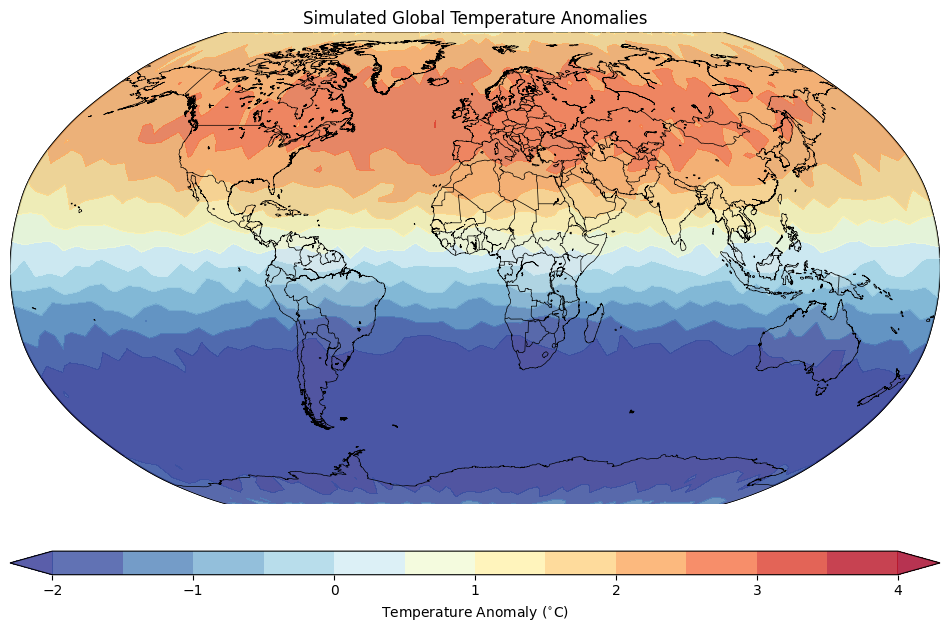

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
plt.figure(figsize=(12, 10))
m = Basemap(projection='robin', lon_0=0, resolution='l') # Robinson projection for global view

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Create dummy data for global temperature anomalies
lons = np.linspace(-180, 180, 72)
lats = np.linspace(-90, 90, 36)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Simulate temperature anomalies (e.g., warmer near poles, some variation)
temp_anomalies = (np.sin(np.deg2rad(lat_grid * 2)) * np.cos(np.deg2rad(lon_grid / 4)) * 2) + \
                 (np.random.rand(lat_grid.shape[0], lat_grid.shape[1]) - 0.5) * 0.5 + \
                 (lat_grid / 90) * 1.5 # Trend warmer towards poles

# Convert lat/lon grid to map coordinates
x_grid, y_grid = m(lon_grid, lat_grid)

# Define contour levels and colormap
levels = np.arange(-2, 4.1, 0.5) # Contour levels from -2 to 4 in steps of 0.5
cmap = plt.cm.RdYlBu_r # Red-Yellow-Blue reversed colormap (cooler colors for lower values)

# Plot filled contours
cs = m.contourf(x_grid, y_grid, temp_anomalies, levels=levels, cmap=cmap, alpha=0.8, extend='both')

# Add a color bar
cbar = m.colorbar(cs, location='bottom', pad="10%", label='Temperature Anomaly ($^{\circ}$C)')

plt.title("Simulated Global Temperature Anomalies")
plt.show()

### Vector Plots on Maps
Vector plots are used to visualize directional data, such as wind patterns or ocean currents, showing both direction and magnitude.

-   **`m.quiver(x, y, u, v, scale=None, width=None, headwidth=3, headlength=5, headaxislength=4.5, minshaft=1, minlength=1, pivot='tail', color='black', alpha=1.0, zorder=None)`**:
    -   **Purpose:** Plots arrows representing vectors.
    -   **`x`, `y`:** Projected x and y coordinates of the vector origins.
    -   **`u`, `v`:** Components of the vector in the x and y directions (e.g., zonal and meridional wind components).
    -   **`scale`:** Data units per arrow length unit. A smaller scale makes arrows longer.
    -   **`width`:** Shaft width in points.
    -   **`color`:** Color of the arrows.
    -   **`headwidth`, `headlength`, `headaxislength`:** Parameters controlling the arrow head appearance.
    -   **`pivot`:** The point of the arrow that corresponds to the `(x, y)` location. Options: `'tail'`, `'middle'`, `'tip'`.


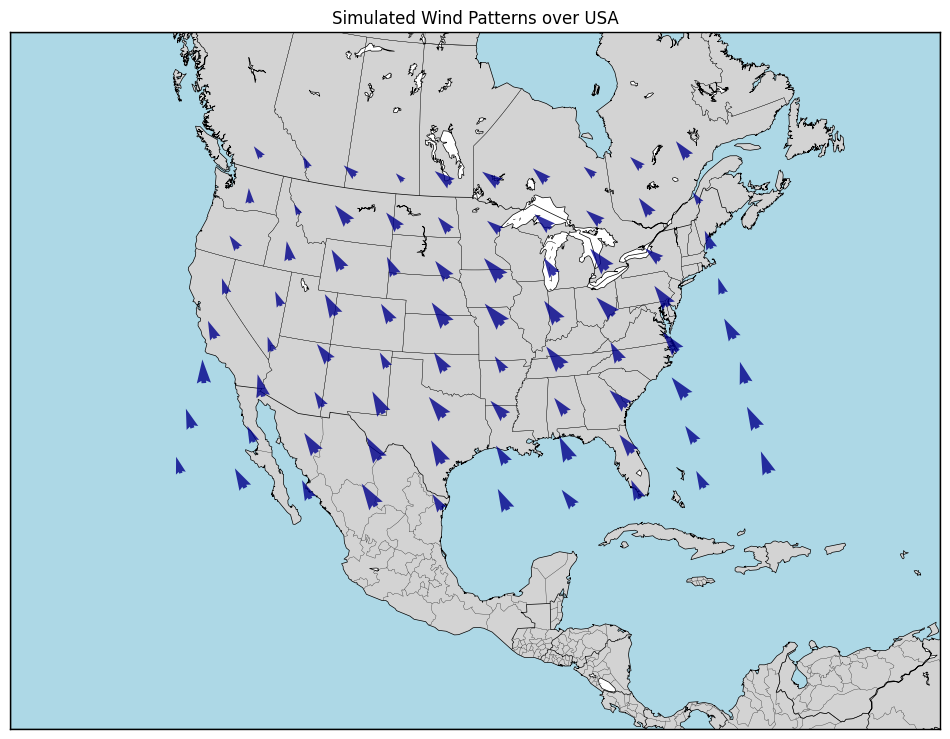

In [6]:
plt.figure(figsize=(12, 10))
m = Basemap(projection='lcc', width=8000000, height=6000000, \
            lat_0=35, lon_0=-95, resolution='l') # Centered over USA

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.2)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Create dummy data for wind vectors over a region (e.g., USA)
lons = np.linspace(-120, -70, 10)
lats = np.linspace(25, 50, 8)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Simulate wind components (u: zonal, v: meridional)
u_wind = 10 * np.cos(np.deg2rad(lon_grid * 2)) + np.random.rand(*lon_grid.shape) * 5
v_wind = 8 * np.sin(np.deg2rad(lat_grid * 3)) + np.random.rand(*lat_grid.shape) * 5

# Convert lat/lon grid to map coordinates
x_wind, y_wind = m(lon_grid, lat_grid)

# Plot wind vectors
# scale: adjust to make arrows a reasonable length. Smaller scale = longer arrows.
# color: color of the arrows.
m.quiver(x_wind, y_wind, u_wind, v_wind, scale=500, color='darkblue', alpha=0.8, zorder=5)

plt.title("Simulated Wind Patterns over USA")
plt.show()

### Heatmaps/Choropleth Maps (Introduction to GeoPandas)
Choropleth maps are thematic maps in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed. For this, `GeoPandas` is a much more suitable tool than `Basemap` alone, as it integrates spatial data with tabular data seamlessly.

#### Introduction to GeoPandas
`GeoPandas` extends the data types used by `pandas` to allow spatial operations on geometric types. It combines the capabilities of `pandas` and `shapely` (for geometric objects) with `fiona` (for file access) and `pyproj` (for projections and coordinate transformations).

A `GeoDataFrame` is a tabular data structure that contains a `geometry` column, which stores geometric objects (points, lines, polygons) representing geographical features.

-   **Loading Shapefiles:** GeoPandas can easily load various geospatial file formats, most commonly shapefiles (`.shp`), which contain the geometric boundaries for regions.
    -   `gpd.read_file('path/to/shapefile.shp')`
-   **Merging Data:** You often need to merge your statistical data (e.g., population, GDP) with the geographic data (shapefile) based on a common identifier (e.g., country code, state name).
    -   `gdf.merge(df, on='common_column', how='left')`
-   **Plotting Choropleth:** GeoPandas' `plot()` method, combined with Matplotlib, makes creating choropleth maps straightforward.
    -   **`gdf.plot(column='data_column', cmap='colormap', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(width, height))`**:
        -   **`column`:** The name of the column in the `GeoDataFrame` whose values will be used to color the polygons.
        -   **`cmap`:** Colormap to use (e.g., `'viridis'`, `'Reds'`, `'Blues'`). Choose appropriate colormaps (sequential for magnitude, diverging for deviations).
        -   **`linewidth`:** Width of the polygon borders.
        -   **`edgecolor`:** Color of the polygon borders.
        -   **`legend`:** Boolean, whether to show a color legend.
        -   **`figsize`:** Size of the Matplotlib figure.


In [1]:
# For this example, we'll use a built-in dataset from GeoPandas for world countries.
# If you had your own shapefile, you would use: world = gpd.read_file("path/to/your/shapefile.shp")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Let's create some dummy population density data for a few countries
population_data = pd.DataFrame({
    'name': ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Nigeria', 'Germany', 'Japan', 'United Kingdom', 'France'],
    'population_density': [145, 464, 36, 147, 25, 226, 237, 347, 275, 119]
})

# Merge the population data with the GeoDataFrame
world = world.merge(population_data, on='name', how='left')

# Fill NaN values (countries not in our dummy data) with 0 for consistent coloring
world['population_density'] = world['population_density'].fillna(0)

plt.figure(figsize=(15, 10))

# Plotting the choropleth map
# column: 'population_density' is the data column to visualize
# cmap: 'YlGnBu' (Yellow-Green-Blue) is a sequential colormap, good for showing increasing values
# linewidth: thickness of country borders
# edgecolor: color of country borders
# legend: displays the color bar legend
world.plot(column='population_density', cmap='YlGnBu', linewidth=0.8, edgecolor='0.8', legend=True,
           legend_kwds={'label': "Population Density (people/km²)", 'orientation': "horizontal"})

plt.title("World Population Density (Simulated Data)", fontsize=16)
plt.axis('off') # Turn off axes for a cleaner map look
plt.show()

NameError: name 'gpd' is not defined

## 5. Case Studies: Telling Stories with Geographic Data
Now, let's apply what we've learned to some real-world (or simulated real-world) scenarios to see how geographic data visualization can convey powerful stories.

### Case Study 1: Analyzing Global Earthquake Activity
**Story:** We want to visualize recent significant earthquake activity around the world to identify seismic zones and understand the distribution of earthquake magnitudes and depths.

**Data:** For this example, we'll simulate earthquake data. In a real scenario, you would fetch this from sources like the USGS Earthquake Hazards Program API.

**Plot:** A scatter plot on a global map where each point represents an earthquake. The color of the point will indicate magnitude, and the size will indicate depth (or vice-versa, depending on what you want to emphasize).


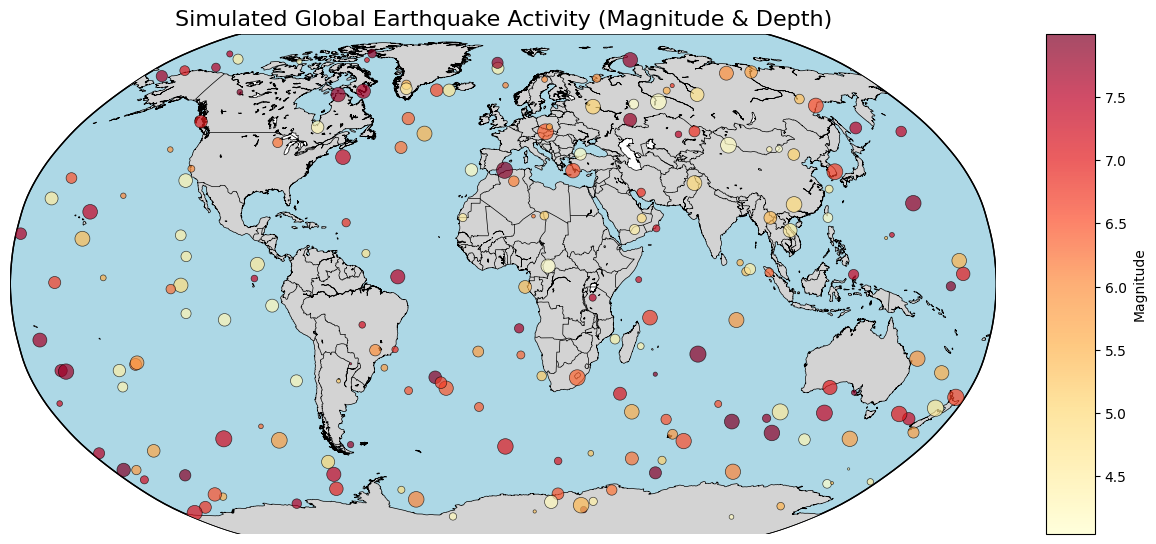

In [3]:
# Simulate Earthquake Data
np.random.seed(42) # for reproducibility
num_earthquakes = 200
eq_lats = np.random.uniform(-80, 80, num_earthquakes)
eq_lons = np.random.uniform(-180, 180, num_earthquakes)
eq_magnitudes = np.random.uniform(4.0, 8.0, num_earthquakes) # Magnitude 4.0 to 8.0
eq_depths = np.random.uniform(0, 700, num_earthquakes) # Depth in km

# Create a DataFrame
earthquakes_df = pd.DataFrame({
    'latitude': eq_lats,
    'longitude': eq_lons,
    'magnitude': eq_magnitudes,
    'depth': eq_depths
})

plt.figure(figsize=(14, 12))
m = Basemap(projection='robin', lon_0=0, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Convert earthquake lat/lon to map coordinates
x_eq, y_eq = m(earthquakes_df['longitude'].values, earthquakes_df['latitude'].values)

# Plot earthquakes
# s (size): Use depth to scale marker size. Deeper earthquakes might be larger to emphasize.
# c (color): Use magnitude to color the markers. A sequential colormap like 'YlOrRd' is good for magnitude.
# cmap: 'YlOrRd' (Yellow-Orange-Red) for magnitude, showing increasing intensity
# alpha: transparency to see overlapping points, common in dense earthquake plots
# edgecolors: make markers easier to distinguish
scatter = m.scatter(x_eq, y_eq,
                    s=earthquakes_df['depth'] / 5, # Scale size by depth (adjust divisor for visual appeal)
                    c=earthquakes_df['magnitude'],
                    cmap='YlOrRd',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=0.5,
                    zorder=5)

# Add a color bar for magnitude
cbar = m.colorbar(scatter, location='right', pad="5%", label='Magnitude')

plt.title("Simulated Global Earthquake Activity (Magnitude & Depth)", fontsize=16)
plt.show()

### Story Conveyed:
#This map visually highlights regions with higher simulated earthquake activity. The color gradient (yellow to red) immediately draws attention to areas with stronger earthquakes, while the size of the circles gives a sense of the earthquake's depth. For instance, you might observe clusters of larger, redder circles along plate boundaries, indicating active seismic zones. Smaller, yellower circles could represent less intense or shallower events. This type of visualization helps in understanding the spatial distribution and characteristics of seismic events.

### Case Study 2: Visualizing Climate Change Impacts (Temperature Anomalies)
**Story:** We want to visualize how temperature anomalies have changed globally over different periods, highlighting regions experiencing significant warming or cooling.

**Data:** We'll use simulated temperature anomaly data for different years. In a real application, this would come from climate datasets (e.g., NASA GISS, NOAA).

**Plot:** A series of choropleth maps (or an animated one using interactive libraries later) showing temperature anomalies by country/region for different time points. This helps in visualizing trends over time.


In [4]:
# We need to download the naturalearth_lowres dataset first
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip -o ne_110m_admin_0_countries.zip -d ne_110m_admin_0_countries

# Load world map data using GeoPandas
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filter out Antarctica for cleaner visualization if desired, or keep it.
# The country name column is 'ADMIN' not 'name'
world = world[(world.ADMIN != "Antarctica") & (world.ADMIN != "Fr. S. Antarctic Lands")]

# Simulate Temperature Anomaly Data for different years
np.random.seed(43)
countries = world['ADMIN'].unique()

temp_anomalies_2000 = pd.DataFrame({
    'ADMIN': countries,
    'temp_anomaly': np.random.uniform(-1.0, 1.0, len(countries))
})
temp_anomalies_2020 = pd.DataFrame({
    'ADMIN': countries,
    'temp_anomaly': np.random.uniform(0.5, 2.5, len(countries)) + np.random.rand(len(countries)) * 0.5 # Generally warmer
})

# Merge data with GeoDataFrame
world_2000 = world.merge(temp_anomalies_2000, on='ADMIN', how='left')
world_2020 = world.merge(temp_anomalies_2020, on='ADMIN', how='left')

# Fill NaN values for countries not in our simulated data (e.g., small islands)
world_2000['temp_anomaly'] = world_2000['temp_anomaly'].fillna(0)
world_2020['temp_anomaly'] = world_2020['temp_anomaly'].fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot for 2000
world_2000.plot(column='temp_anomaly', cmap='RdBu_r', linewidth=0.8, edgecolor='0.8', ax=axes[0],
                legend=True, vmin=-2, vmax=2,
                legend_kwds={'label': "Temperature Anomaly ($^{\circ}$C) - 2000", 'orientation': "horizontal"})
axes[0].set_title("Global Temperature Anomaly - 2000 (Simulated)", fontsize=14)
axes[0].axis('off')

# Plot for 2020
world_2020.plot(column='temp_anomaly', cmap='RdBu_r', linewidth=0.8, edgecolor='0.8', ax=axes[1],
                legend=True, vmin=-2, vmax=2,
                legend_kwds={'label': "Temperature Anomaly ($^{\circ}$C) - 2020", 'orientation': "horizontal"})
axes[1].set_title("Global Temperature Anomaly - 2020 (Simulated)", fontsize=14)
axes[1].axis('off')

plt.suptitle("Comparing Global Temperature Anomalies Over Time", fontsize=18, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Adjust layout to prevent title overlap
plt.show()

### Story Conveyed:
# By comparing the two maps, we can observe a clear shift in global temperature anomalies from 2000 to 2020 (based on our simulated data). The 2000 map might show a mix of slightly warmer and cooler regions, while the 2020 map, with its more prevalent red hues, visually indicates a widespread increase in temperature anomalies across many parts of the world. This type of visualization effectively communicates the concept of global warming and its spatial distribution over time, allowing for a quick visual comparison of climate trends.

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


DataSourceError: ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp: No such file or directory

### Case Study 3: Mapping Urban Infrastructure (e.g., Public Transport Network)
**Story:** We want to visualize the public transport network of a city, showing train/metro lines and stations, to assess connectivity and identify areas with good or poor access.

**Data:** We'll simulate data for a fictional city's public transport system. In a real scenario, this would come from OpenStreetMap, city open data portals, or GTFS feeds.

**Plot:** A combination of line plots for the transport routes and scatter plots for the stations, overlaid on a local map. For this, interactive maps are often preferred, so we'll use `Folium`.


In [5]:
# Simulate Public Transport Data for a Fictional City (e.g., 'Metropolis')
# Line 1 (North-South)
line1_coords = [
    (34.0, -118.2), (34.1, -118.2), (34.2, -118.2), (34.3, -118.2), (34.4, -118.2)
]
line1_stations = [
    {'name': 'Central Station', 'lat': 34.0, 'lon': -118.2},
    {'name': 'Northwood', 'lat': 34.2, 'lon': -118.2},
    {'name': 'Riverfront', 'lat': 34.4, 'lon': -118.2}
]

# Line 2 (East-West)
line2_coords = [
    (34.2, -118.4), (34.2, -118.3), (34.2, -118.2), (34.2, -118.1), (34.2, -118.0)
]
line2_stations = [
    {'name': 'West End', 'lat': 34.2, 'lon': -118.4},
    {'name': 'Central Station', 'lat': 34.2, 'lon': -118.2}, # Intersection with Line 1
    {'name': 'East Side', 'lat': 34.2, 'lon': -118.0}
]

# Initialize a Folium map centered around the city
m_folium = folium.Map(location=[34.2, -118.2], zoom_start=12, tiles='OpenStreetMap')

# Add Line 1 to the map
folium.PolyLine(locations=line1_coords, color='blue', weight=5, opacity=0.8,
                tooltip="Line 1: North-South Line").add_to(m_folium)

# Add stations for Line 1
for station in line1_stations:
    folium.CircleMarker(
        location=[station['lat'], station['lon']],
        radius=8,
        color='darkblue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=1,
        tooltip=station['name'] + " (Line 1)"
    ).add_to(m_folium)

# Add Line 2 to the map
folium.PolyLine(locations=line2_coords, color='red', weight=5, opacity=0.8,
                tooltip="Line 2: East-West Line").add_to(m_folium)

# Add stations for Line 2
for station in line2_stations:
    # Handle 'Central Station' to avoid duplicate markers if already added by Line 1
    if station['name'] == 'Central Station':
        color = 'purple' # Indicate an interchange station
        fill_color = 'magenta'
    else:
        color = 'darkred'
        fill_color = 'lightcoral'

    folium.CircleMarker(
        location=[station['lat'], station['lon']],
        radius=8,
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=1,
        tooltip=station['name'] + " (Line 2)"
    ).add_to(m_folium)

# Display the map (this will render in the notebook output)
m_folium

### Story Conveyed:
This interactive map clearly shows the simulated public transport network of 'Metropolis'. You can see the distinct blue (Line 1) and red (Line 2) lines, with circular markers indicating the stations. The 'Central Station' is highlighted in purple/magenta, immediately signaling it as an interchange point. By zooming and panning, a user can explore the network, identify areas well-served by public transport, and potentially spot 'transport deserts' (areas far from any station). This visualization is crucial for urban planners, commuters, and policymakers to understand and improve urban mobility.

## 6. Advanced Topics & Interactive Maps
While Basemap is great for static maps, modern data visualization often benefits from interactivity. Here, we'll briefly touch upon using `GeoPandas` with custom shapefiles, and introduce `Folium` and `Plotly Express` for interactive mapping.

### Basemap with Custom Shapefiles
Basemap can also draw features from custom shapefiles, allowing you to plot specific geographical boundaries that might not be built-in (e.g., administrative districts, ecological zones).

-   **`m.readshapefile('path/to/shapefile', 'name', drawbounds=True, color='black', linewidth=0.5)`**:
    -   **Purpose:** Reads a shapefile and draws its features.
    -   **`'path/to/shapefile'`:** Path to the shapefile (without the `.shp` extension).
    -   **`'name'`:** A name to associate with the shapefile features. This name will be used to store the polygon data in `m.name`.
    -   **`drawbounds`:** If `True`, draws the boundaries of the shapes.
    -   **`color`, `linewidth`:** Styling for the boundaries.

In [36]:
# Download the shape file
# !wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
!pwd
!unzip ne_10m_admin_1_states_provinces.zip -d ne_10m_admin_1_states_provinces
!ls

/content
Archive:  ne_10m_admin_1_states_provinces.zip
  inflating: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.README.html  
 extracting: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.VERSION.txt  
 extracting: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.cpg  
  inflating: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.dbf  
  inflating: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.prj  
  inflating: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp  
  inflating: ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shx  
ne_10m_admin_1_states_provinces      sample_data
ne_10m_admin_1_states_provinces.zip


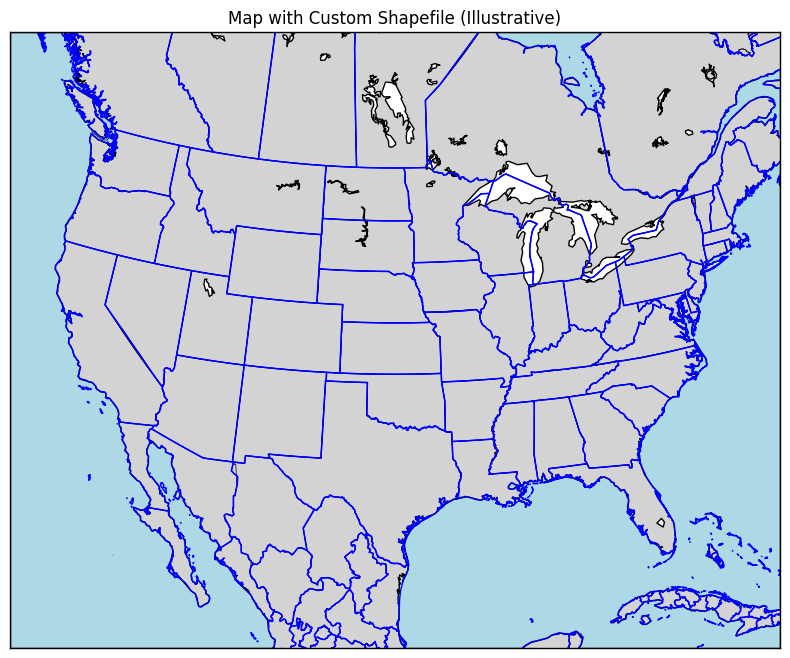

In [39]:
plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', width=5000000, height=4000000, lat_0=39, lon_0=-98, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='lightblue')

# Assuming 'ne_10m_admin_1_states_provinces' is a downloaded Natural Earth shapefile for states/provinces
# You would typically have files like .shp, .shx, .dbf, .prj in the same directory
m.readshapefile('./ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces', 'states', drawbounds=True, color='blue', linewidth=1.0)
plt.title("Map with Custom Shapefile (Illustrative)")
plt.show()

### Introduction to Folium for Interactive Maps
`Folium` makes it easy to visualize data on an interactive Leaflet map. You can zoom, pan, and add various layers like markers, circles, and even custom GeoJSON overlays. This is particularly useful for web applications or presentations where static images aren't enough.

-   **`folium.Map(location=[lat, lon], zoom_start=zoom_level, tiles='tile_provider')`**:
    -   **Purpose:** Initializes a Folium map.
    -   **`location`:** A list `[latitude, longitude]` to center the map.
    -   **`zoom_start`:** Initial zoom level.
    -   **`tiles`:** Map tile provider (e.g., `'OpenStreetMap'`, `'Stamen Terrain'`, `'CartoDB positron'`).
-   **`folium.Marker([lat, lon], popup='text', icon=folium.Icon(color='color'))`**:
    -   **Purpose:** Adds a marker to the map.
    -   **`location`:** `[latitude, longitude]` of the marker.
    -   **`popup`:** Text to display when the marker is clicked.
    -   **`icon`:** Custom icon for the marker.
-   **`folium.Circle([lat, lon], radius=meters, color='color', fill=True, fill_color='fill_color')`**:
    -   **Purpose:** Adds a circle marker.
    -   **`radius`:** Radius of the circle in meters.
-   **`folium.PolyLine(locations=list_of_lat_lon_tuples, color='color')`**:
    -   **Purpose:** Draws a line on the map.


In [11]:
# Example: Interactive map of a few famous landmarks
landmarks = [
    {'name': 'Eiffel Tower', 'lat': 48.8584, 'lon': 2.2945, 'info': 'Iconic landmark in Paris.'},
    {'name': 'Statue of Liberty', 'lat': 40.6892, 'lon': -74.0445, 'info': 'Symbol of freedom in NYC.'},
    {'name': 'Taj Mahal', 'lat': 27.1751, 'lon': 78.0421, 'info': 'Marble mausoleum in Agra, India.'}
]

# Initialize map centered at a general location
m_interactive = folium.Map(location=[30, 0], zoom_start=2, tiles='CartoDB positron')

# Add markers for each landmark
for landmark in landmarks:
    folium.Marker(
        location=[landmark['lat'], landmark['lon']],
        popup=f"<b>{landmark['name']}</b><br>{landmark['info']}",
        icon=folium.Icon(color='blue', icon='info-sign') # You can choose different icons
    ).add_to(m_interactive)

# You can also add a circle marker for a specific point, e.g., your current location
folium.Circle(
    location=[10.93, 76.88], # Ettimadai, Tamil Nadu, India
    radius=5000, # in meters
    color='green',
    fill=True,
    fill_color='lightgreen',
    fill_opacity=0.6,
    popup="My Current Location (Ettimadai)"
).add_to(m_interactive)

m_interactive # Display the map

### Plotly Express for Interactive Choropleths
`Plotly Express` is a high-level wrapper for Plotly, designed for quick and easy creation of interactive, publication-quality figures. It's particularly good for interactive choropleth maps, including animated ones.

-   **`px.choropleth(data_frame, locations='country_code_column', color='data_column', hover_name='country_name_column', animation_frame='year_column', color_continuous_scale='colorscale', projection='projection_type', title='Map Title')`**:
    -   **Purpose:** Creates an interactive choropleth map.
    -   **`data_frame`:** A Pandas DataFrame containing your data.
    -   **`locations`:** Column in `data_frame` with country codes (e.g., ISO alpha-3 codes like 'USA', 'CHN'). Plotly Express uses these to match with its built-in geographical data.
    -   **`color`:** Column in `data_frame` whose values determine the color of each region.
    -   **`hover_name`:** Column for text to appear when hovering over a region.
    -   **`animation_frame`:** Column to create an animation over time (e.g., 'year').
    -   **`color_continuous_scale`:** Colormap (e.g., `'Viridis'`, `'Plasma'`, `'RdBu'`).
    -   **`projection`:** Map projection type (e.g., `'natural earth'`, `'robinson'`, `'mercator'`).
    -   **`title`:** Title of the map.
    -   **`scope`:** Geographic scope (e.g., `'world'`, `'usa'`, `'europe'`).
    -   **`template`:** Plotly theme (e.g., `'plotly_dark'`, `'ggplot2'`).


In [3]:
import pandas as pd
import plotly.express as px
# Example: Interactive World Population Growth (simulated data)
data_pop = {
    'country_code': ['USA', 'CHN', 'IND', 'DEU', 'BRA', 'JPN', 'GBR'],
    'country_name': ['United States', 'China', 'India', 'Germany', 'Brazil', 'Japan', 'United Kingdom'],
    '2000_pop_mil': [282, 1262, 1053, 82, 175, 127, 59],
    '2020_pop_mil': [331, 1440, 1380, 83, 212, 126, 67]
}
df_pop = pd.DataFrame(data_pop)

# Reshape data for animation_frame
df_melted = df_pop.melt(id_vars=['country_code', 'country_name'],
                        value_vars=['2000_pop_mil', '2020_pop_mil'],
                        var_name='Year', value_name='Population (Millions)')
df_melted['Year'] = df_melted['Year'].str.replace('_pop_mil', '') # Clean year column

fig = px.choropleth(df_melted,
                    locations='country_code', # ISO alpha-3 codes
                    color='Population (Millions)', # Column to color by
                    hover_name='country_name', # Text on hover
                    animation_frame='Year', # Column for animation
                    color_continuous_scale=px.colors.sequential.Plasma, # Colormap
                    projection='natural earth', # Map projection
                    title='World Population Growth (2000 vs 2020 - Simulated)',
                    height=600,
                    template='plotly_white') # Theme for the plot

fig.update_geos(fitbounds="locations", visible=False) # Fit map to locations, hide background
fig.show()

## 7. Best Practices in Geographic Data Visualization
Creating effective geographic visualizations goes beyond just plotting data. Consider these best practices to ensure your maps are informative, accurate, and impactful:

-   **Choosing Appropriate Color Schemes:**
    -   **Sequential:** For data that goes from low to high (e.g., population density, temperature). Use single-hue or multi-hue sequential colormaps (e.g., `viridis`, `Blues`, `YlGnBu`).
    -   **Diverging:** For data with a meaningful midpoint, showing deviations from that point (e.g., temperature anomalies, election results). Use colormaps that diverge from a central neutral color to two distinct hues (e.g., `RdBu`, `coolwarm`).
    -   **Categorical:** For distinct categories without inherent order (e.g., land use types, different transport lines). Use qualitative colormaps (e.g., `tab10`, `Paired`).
    -   **Avoid Rainbow Colormaps:** They can mislead by implying order where there is none, and human perception of color changes is not uniform across the spectrum.

-   **Handling Missing Data:**
    -   Decide how to represent missing values (e.g., leave areas uncolored, use a distinct neutral color, or exclude them).
    -   Clearly state if and how missing data is handled in your map's legend or annotations.

-   **Adding Legends and Annotations Effectively:**
    -   **Clear Legends:** Ensure your color bars, symbol legends, and scale bars are clearly labeled and easy to interpret.
    -   **Annotations:** Use text labels, arrows, or inset maps to highlight specific features, provide context, or draw attention to key findings.
    -   **Titles and Subtitles:** Provide concise and descriptive titles that explain the map's content and purpose.

-   **Accessibility Considerations:**
    -   **Colorblind-Friendly Palettes:** Use colormaps that are distinguishable by individuals with color vision deficiencies (e.g., `viridis`, `plasma`, `cividis`, `magma` in Matplotlib/Plotly).
    -   **Sufficient Contrast:** Ensure good contrast between map elements (e.g., land/water, lines/background, text/background) for readability.
    -   **Descriptive Text:** Provide alternative text descriptions for maps, especially for those who cannot fully perceive the visual information.

-   **Ethical Considerations:**
    -   **Data Privacy:** Be mindful of sensitive data and ensure individual privacy is protected, especially when mapping granular data.
    -   **Misrepresentation:** Be aware of how your choice of projection, color scheme, and data classification can influence interpretation and potentially misrepresent reality. For example, using a non-equal-area projection for population density can be misleading.
    -   **Source Attribution:** Always cite your data sources.

By adhering to these best practices, you can create geographic visualizations that are not only visually appealing but also highly effective in communicating insights and supporting informed decision-making.

## Conclusion
Geographic data visualization is an indispensable tool for understanding and communicating spatial information. In this notebook, we've covered the fundamentals, from understanding various map projections and their implications to drawing basic map elements and plotting diverse datasets using `Basemap`.

We then explored how to tell compelling stories through case studies, visualizing global earthquake activity, climate change impacts, and urban infrastructure. Finally, we touched upon advanced topics and interactive mapping with `Folium` and `Plotly Express`, emphasizing the importance of best practices for creating effective, accurate, and ethical geographic visualizations.

### Key Takeaways
-   **Projections Matter:** The choice of map projection significantly impacts how data is perceived due to inherent distortions. Always select a projection suitable for your data and message.
-   **Basemap for Static Maps:** Excellent for high-quality, customizable static maps with fine control over map elements.
-   **GeoPandas for Geospatial Data:** Integrates seamlessly with Pandas for handling and plotting vector geographic data, especially for choropleth maps.
-   **Folium & Plotly for Interactivity:** When dynamic exploration is needed, Folium provides interactive Leaflet maps, while Plotly Express offers powerful interactive and animated choropleths.
-   **Design Principles:** Effective maps require careful consideration of color schemes, legends, annotations, and accessibility to avoid misinterpretation and ensure clarity.

### Further Resources and Next Steps
-   **Basemap Documentation:** [https://matplotlib.org/basemap/](https://matplotlib.org/basemap/)
-   **GeoPandas Documentation:** [https://geopandas.org/](https://geopandas.org/)
-   **Folium Documentation:** [https://python-visualization.github.io/folium/](https://python-visualization.github.io/folium/)
-   **Plotly Express Documentation:** [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/)
-   **Natural Earth Data:** For free vector and raster map data: [https://www.naturalearthdata.com/](https://www.naturalearthdata.com/)
-   **USGS Earthquake Hazards Program API:** For real-time earthquake data: [https://earthquake.usgs.gov/fdsnws/event/1/](https://earthquake.usgs.gov/fdsnws/event/1/)

Continue experimenting with different datasets, projections, and visualization techniques to master the art of geographic data visualization!